**Import all the necessary libraries**

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Read csv file into 'youtubeMetrics' DataFrame using pandas**

In [2]:
youtubeMetrics = pd.read_csv('train.csv')

**Display contents of DataFrame**

In [3]:
youtubeMetrics.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


**Display DataFrame values**

In [4]:
metricsValues = youtubeMetrics.values
metricsValues

array([['VID_18655', 40, '1031602', ..., '2016-09-14', 'PT7M37S', 'F'],
       ['VID_14135', 2, '1707', ..., '2016-10-01', 'PT9M30S', 'D'],
       ['VID_2187', 1, '2023', ..., '2016-07-02', 'PT2M16S', 'C'],
       ...,
       ['VID_805', 4, '3479', ..., '2013-08-23', 'PT3M13S', 'B'],
       ['VID_19843', 1, '963', ..., '2010-10-02', 'PT26S', 'G'],
       ['VID_8534', 1, '15212', ..., '2016-02-19', 'PT1M1S', 'D']],
      dtype=object)

**Information(column names, datatype) about the DataFrame**

In [5]:
youtubeMetrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


**Shape(number of rows and column) of the DataFrame**

In [6]:
np.shape(metricsValues)

(14999, 9)

**Number of Nan values present in DataFrame**

In [7]:
youtubeMetrics.isna().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

**Convert categorical values to numerical values in category column**

In [8]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
youtubeMetrics['category'] = youtubeMetrics['category'].map(category)
youtubeMetrics['category']

0        6
1        4
2        3
3        8
4        4
        ..
14994    1
14995    4
14996    2
14997    7
14998    4
Name: category, Length: 14999, dtype: int64

**Meaningless values inside DataFrame**

In [9]:
youtubeMetrics[youtubeMetrics['views'] == 'F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
7447,VID_9269,1,F,0,1,0,2013-10-03,PT21M28S,4
8112,VID_9262,1,F,1,0,0,2013-09-18,PT21M6S,4


**RemovE rows containing these meaningless values from DataFrame**

In [10]:
youtubeMetrics=youtubeMetrics[youtubeMetrics.views!='F']
youtubeMetrics=youtubeMetrics[youtubeMetrics.likes!='F']
youtubeMetrics=youtubeMetrics[youtubeMetrics.dislikes!='F']
youtubeMetrics=youtubeMetrics[youtubeMetrics.comment!='F']

**Convert object datatype to integer**

In [11]:
youtubeMetrics["views"] = pd.to_numeric(youtubeMetrics["views"])
youtubeMetrics["comment"] = pd.to_numeric(youtubeMetrics["comment"])
youtubeMetrics["likes"] = pd.to_numeric(youtubeMetrics["likes"])
youtubeMetrics["dislikes"] = pd.to_numeric(youtubeMetrics["dislikes"])
youtubeMetrics["adview"]=pd.to_numeric(youtubeMetrics["adview"])

**Convert categorical values to numerical values in video id column using LabelEncoder**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
youtubeMetrics['vidid']= le.fit_transform(youtubeMetrics['vidid'])
youtubeMetrics['published'] = le.fit_transform(youtubeMetrics['published'])

**Convert PM7M8S time format to time in seconds format in duration column**

In [13]:
import re
def toSeconds(value):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', value)
    (hours, minutes, seconds) = [ int(n or 0) for n in match.groups()]
    value = hours*3600 + minutes*60 + seconds
    return value

youtubeMetrics['duration'] = youtubeMetrics['duration'].map(toSeconds)


**Datatype of duration column**

In [14]:
youtubeMetrics['duration'].dtype

dtype('int64')

**DataFrame with updated duration column**

In [15]:
youtubeMetrics.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


**Count plot of the column category**

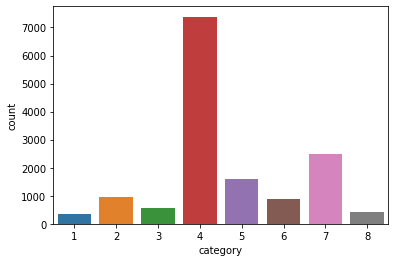

In [16]:
sns.countplot(youtubeMetrics["category"])
plt.show()


**Histogram of the column category**

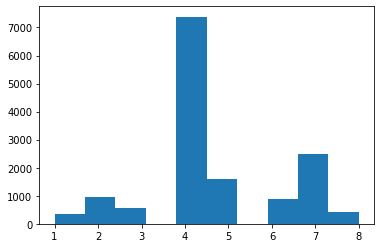

In [17]:
plt.hist(youtubeMetrics["category"])
plt.show()

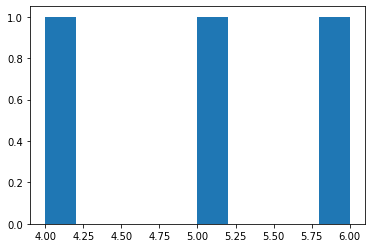

In [4]:
plt.hist([4,5,6])
plt.show()

**Line plot of the column category**

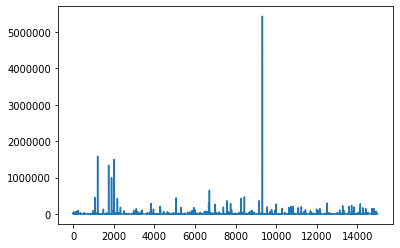

In [18]:
plt.plot(youtubeMetrics["adview"])
plt.show()

**Pairplot of all the features**

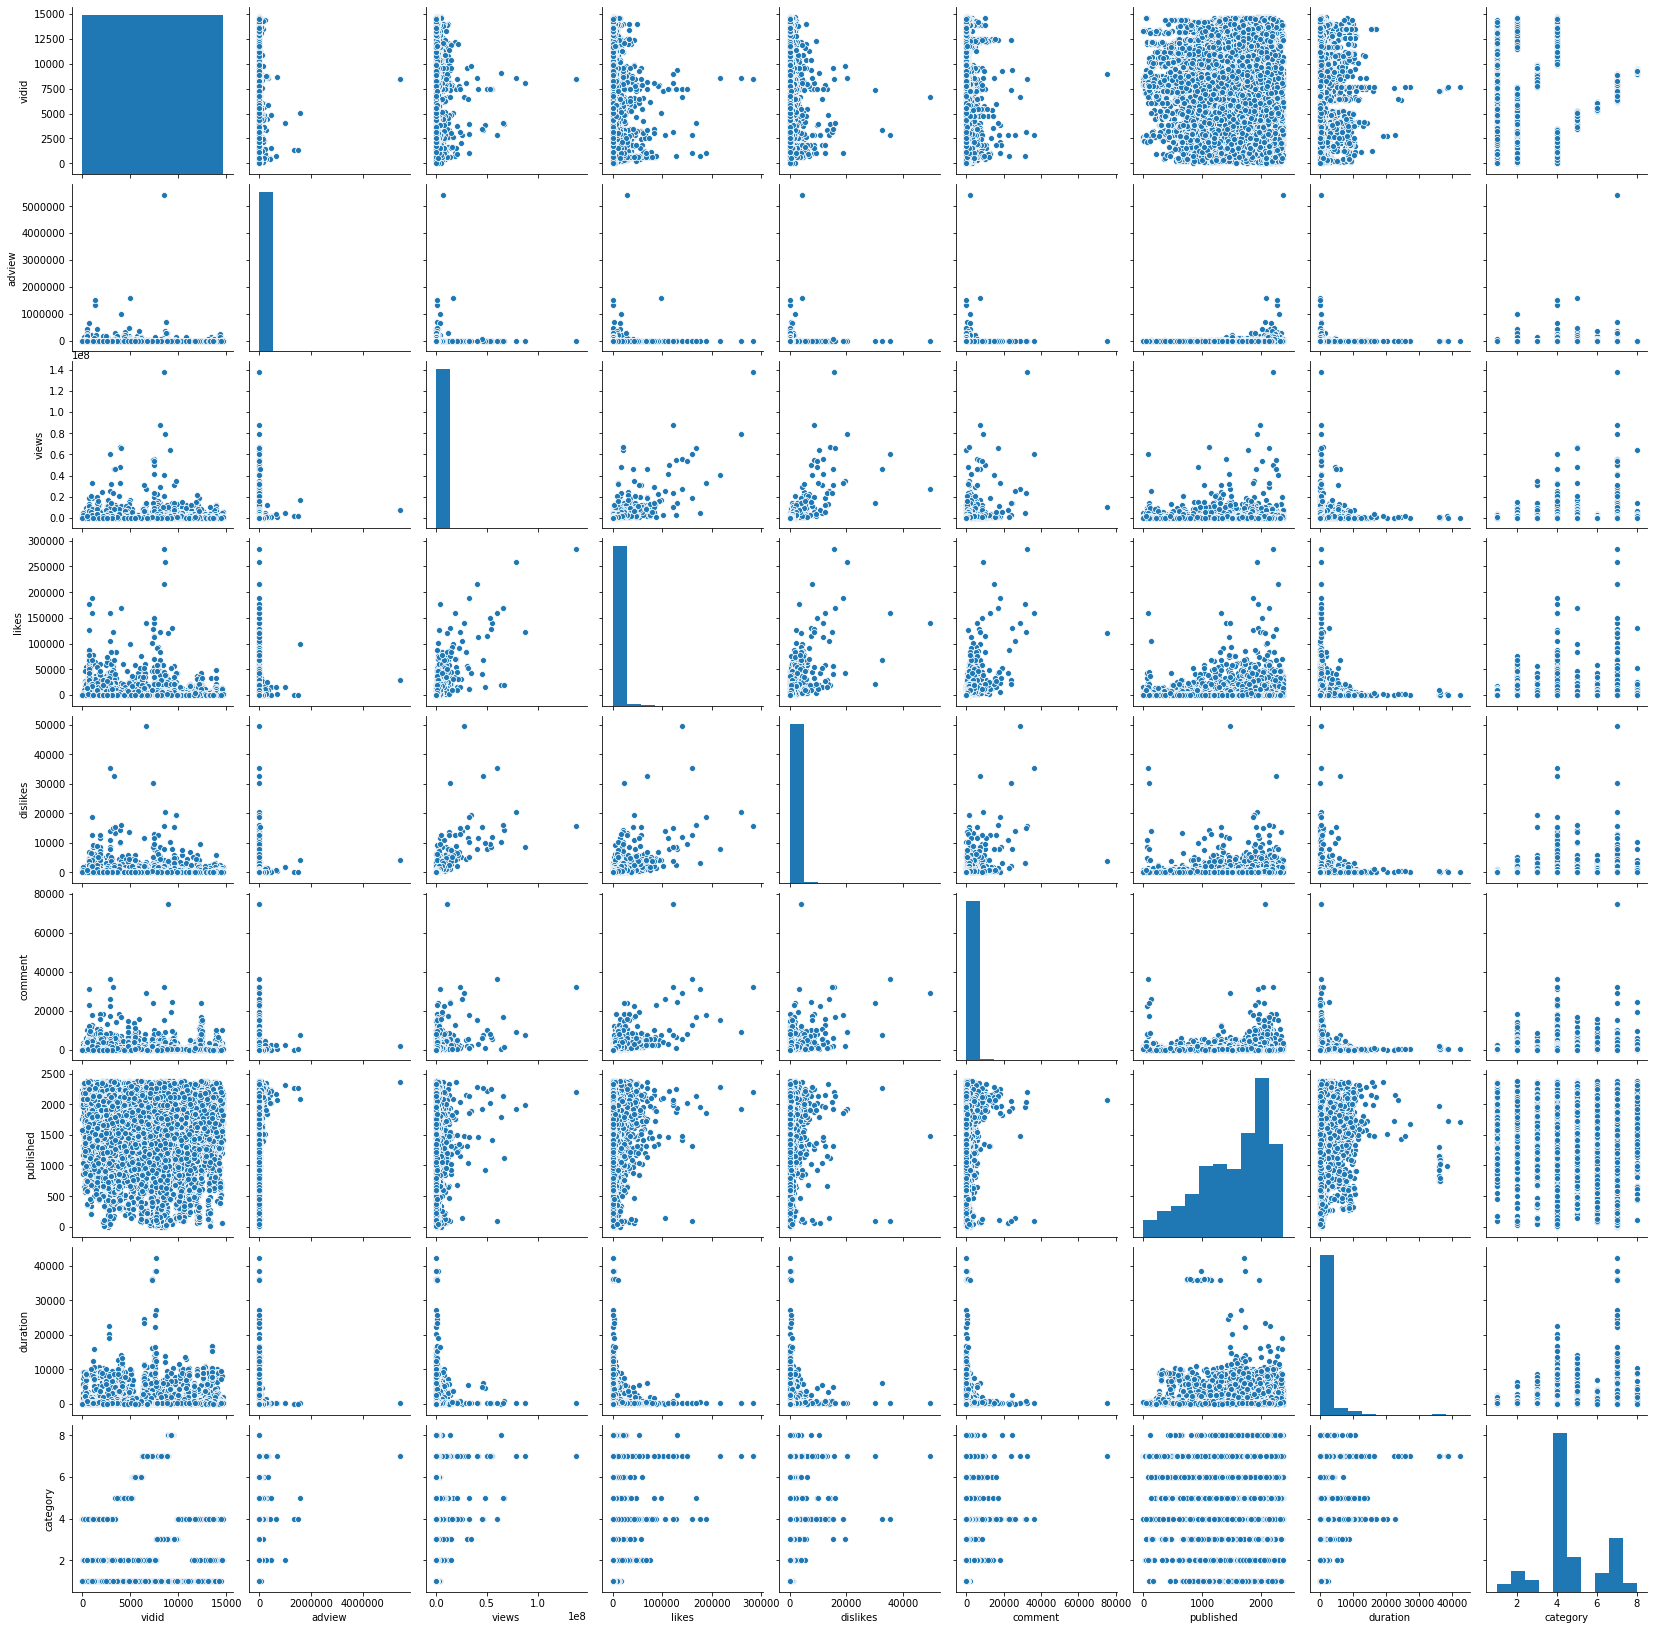

In [19]:
sns.pairplot(youtubeMetrics)

**Remove outliers from adview column**

In [20]:
youtubeMetrics = youtubeMetrics[youtubeMetrics["adview"] <2000000]

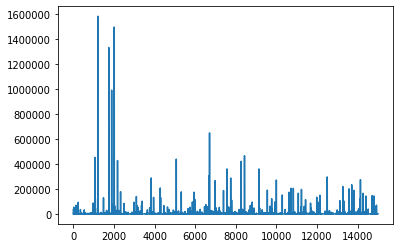

In [63]:
plt.plot(youtubeMetrics["adview"])
plt.show()

In [21]:
youtubeMetrics

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,370,1
14995,11758,1,665673,3849,156,569,1838,236,4
14996,13263,4,3479,16,1,1,1053,193,2
14997,6736,1,963,0,0,0,222,26,7


**Correlation coefficents of all the features**

In [22]:
corr = youtubeMetrics.corr()
corr


,vidid,adview,views,likes,dislikes,comment,published,duration,category
vidid,1.000000,-0.031080,-0.047581,-0.128860,-0.076460,-0.081059,-0.144470,0.006910,-0.038917
adview,-0.031080,1.000000,0.031177,0.046541,0.016686,0.017631,0.055657,-0.019592,-0.004910
views,-0.047581,0.031177,1.000000,0.726599,0.730216,0.410597,0.020110,0.002563,0.032822
likes,-0.128860,0.046541,0.726599,1.000000,0.648631,0.651215,0.096941,-0.042518,-0.009175
dislikes,-0.076460,0.016686,0.730216,0.648631,1.000000,0.532588,0.043745,0.001587,0.011355
comment,-0.081059,0.017631,0.410597,0.651215,0.532588,1.000000,0.114253,-0.037478,-0.034107
published,-0.144470,0.055657,0.020110,0.096941,0.043745,0.114253,1.000000,0.011976,-0.056814
duration,0.006910,-0.019592,0.002563,-0.042518,0.001587,-0.037478,0.011976,1.000000,0.049235
category,-0.038917,-0.004910,0.032822,-0.009175,0.011355,-0.034107,-0.056814,0.049235,1.000000


**Heatmap plot of the correlation coefficients of all features**

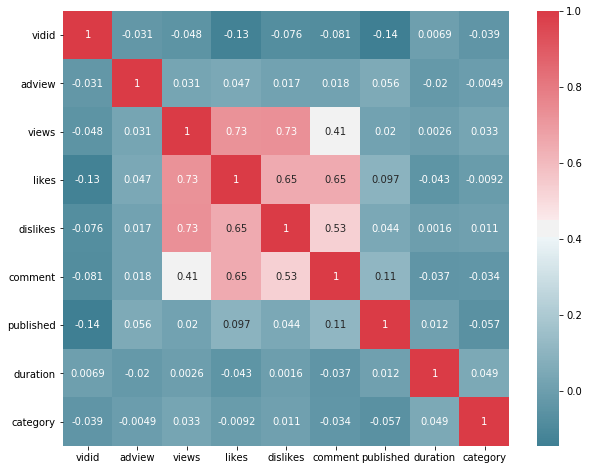

In [23]:
fig=plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

**Split data to x(input features) and y(target)**

In [24]:
x =  youtubeMetrics.drop(['adview','vidid'], axis=1)
y = youtubeMetrics['adview']

**Scale data using minmaxscaler**

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x =scaler.fit_transform(x)

**Split x and y to train and test data**

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Shape of x train**

In [27]:
x_train.shape

(11708, 7)

**Shape of x test**

In [28]:
x_test.shape

(2928, 7)

In [29]:
x_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

**Mean of x train**

In [30]:
x_train.mean()

0.17390968003204882

**Define a function for prediction and evaluating model performance using error metrics**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def print_error(x_test, y_test, model_name):
    prediction = model_name.predict(x_test)
    print('r2score of', model_name, r2_score(y_test, prediction))
    print('Mean Absolute Error of',model_name,':' ,mean_absolute_error(y_test, prediction))
    print('Mean Squared Error of', model_name,':' ,mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error of', model_name,':' ,np.sqrt(mean_squared_error(y_test, prediction)))

**Linear Regression model**

In [32]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
print_error(x_test,y_test, linear_regression)

r2score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) -0.0011056978794592442
Mean Absolute Error of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) : 3555.823894599665
Mean Squared Error of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) : 831728534.4570614
Root Mean Squared Error of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) : 28839.70413262004


**Support Vector Regression model**

In [33]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train,y_train)
print_error(x_test,y_test, supportvector_regressor)

r2score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) -0.003462354104780241
Mean Absolute Error of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) : 1696.9473070431645
Mean Squared Error of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) : 833686467.8028181
Root Mean Squared Error of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) : 28873.62928006831


**Decision Tree Regression model**

In [34]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
print_error(x_test,y_test, decision_tree)



r2score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') -0.810680228315807
Mean Absolute Error of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') : 2825.5553278688526
Mean Squared Error of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_featur

**Random Forest Regression model**

In [35]:

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split=15, min_samples_leaf=2)
random_forest.fit(x_train,y_train)
print_error(x_test,y_test, random_forest)

r2score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 0.24648769420069705
Mean Absolute Error of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      ra

**Deep learning model using keras**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Users\Anil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

**Create a sequential model and add layers to it**

In [37]:
kerasmodel = Sequential([
Dense(6, activation="relu",
input_shape=x_train.shape[1:]), 
Dense(6,activation="relu"),
Dense(1)
])
kerasmodel.compile(optimizer= 'adam',loss= 'mean_squared_error',metrics=["mean_squared_error"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Fit the model**

In [38]:
history = kerasmodel.fit(x_train,y_train,epochs=100)

Epoch 1/100
11708/11708 [==============================] - 1s 49us/sample - loss: 767405895.1553 - mean_squared_error: 767405888.0000
Epoch 2/100
11708/11708 [==============================] - 0s 40us/sample - loss: 767397254.2425 - mean_squared_error: 767397120.0000
Epoch 3/100
11708/11708 [==============================] - 0s 40us/sample - loss: 767380137.2716 - mean_squared_error: 767379968.0000
Epoch 4/100
11708/11708 [==============================] - 0s 42us/sample - loss: 767349994.2100 - mean_squared_error: 767349760.0000
Epoch 5/100
11708/11708 [==============================] - 0s 39us/sample - loss: 767304433.6991 - mean_squared_error: 767304000.0000
Epoch 6/100
11708/11708 [==============================] - 0s 39us/sample - loss: 767247980.6460 - mean_squared_error: 767247680.0000
Epoch 7/100
11708/11708 [==============================] - 0s 40us/sample - loss: 767176580.2713 - mean_squared_error: 767176128.0000
Epoch 8/100
11708/11708 [==============================] - 0s 

**Summary of the model**

In [39]:
kerasmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


**Error metrics of keras model **

In [40]:
print_error(x_test,y_test,kerasmodel)

r2score of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B6D9AB8448> 0.00102130104371001
Mean Absolute Error of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B6D9AB8448> : 3336.0366986384156
Mean Squared Error of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B6D9AB8448> : 829961402.6737676
Root Mean Squared Error of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B6D9AB8448> : 28809.05070761214


**Random Forest is the best model with minimum root mean squared error and comparatively high and positive r2 score**

In [41]:
from joblib import dump, load
dump(random_forest, "randomforest_youtubeadview.pkl")


['randomforest_youtubeadview.pkl']

## Predict adView count for Test data 

**Read csv file into 'test_youtubeMetrics' DataFrame using pandas**

In [42]:
test_youtubeMetrics = pd.read_csv('test.csv')

**Display contents of DataFrame**

In [43]:
test_youtubeMetrics.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


**Number of Nan values present in DataFrame**

In [64]:
test_youtubeMetrics.isna().sum()

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

**Convert categorical values to numerical values in category column**

In [45]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
test_youtubeMetrics['category'] = test_youtubeMetrics['category'].map(category)
test_youtubeMetrics['category']

0       2
1       6
2       4
3       7
4       2
       ..
8759    3
8760    4
8761    6
8762    4
8763    4
Name: category, Length: 8764, dtype: int64

**Meaningless values inside DataFrame**

In [46]:
test_youtubeMetrics[test_youtubeMetrics['views'] == 'F']

,vidid,views,likes,dislikes,comment,published,duration,category
1963,VID_9263,F,2,1,1,2013-10-10,PT21M41S,4


**Remove rows containing these meaningless values from DataFrame**

In [47]:
test_youtubeMetrics=test_youtubeMetrics[test_youtubeMetrics.views!='F']
test_youtubeMetrics=test_youtubeMetrics[test_youtubeMetrics.likes!='F']
test_youtubeMetrics=test_youtubeMetrics[test_youtubeMetrics.dislikes!='F']
test_youtubeMetrics=test_youtubeMetrics[test_youtubeMetrics.comment!='F']

**Convert object datatype to integer**

In [48]:
test_youtubeMetrics["views"] = pd.to_numeric(test_youtubeMetrics["views"])
test_youtubeMetrics["comment"] = pd.to_numeric(test_youtubeMetrics["comment"])
test_youtubeMetrics["likes"] = pd.to_numeric(test_youtubeMetrics["likes"])
test_youtubeMetrics["dislikes"] = pd.to_numeric(test_youtubeMetrics["dislikes"])


**Convert categorical values to numerical values in video id column using LabelEncoder**

In [49]:
le = LabelEncoder()
test_youtubeMetrics['vidid']= le.fit_transform(test_youtubeMetrics['vidid'])
test_youtubeMetrics['published'] = le.fit_transform(test_youtubeMetrics['published'])

**Convert PM7M8S time format to time in seconds format in duration column**

In [50]:

def toSeconds(value):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', value)
    (hours, minutes, seconds) = [ int(n or 0) for n in match.groups()]
    value = hours*3600 + minutes*60 + seconds
    return value

test_youtubeMetrics['duration'] = test_youtubeMetrics['duration'].map(toSeconds)

**Datatype of duration column**

In [51]:
test_youtubeMetrics['duration'].dtype

dtype('int64')

**DataFrame with updated duration column**

In [52]:
test_youtubeMetrics.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


**Split data to x(input features)**

In [53]:
x=test_youtubeMetrics.drop('vidid',axis=1)
x

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2
...,...,...,...,...,...,...,...
8759,111205,471,14,101,231,194,3
8760,1074457,1024,195,65,1800,8315,4
8761,1891692,4606,1109,191,1823,434,6
8762,714859,1639,151,382,1728,195,4


**Scale data using minmaxscaler**

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x =scaler.fit_transform(x)

In [55]:
x

array([[1.95520958e-03, 1.92237996e-02, 6.05168920e-03, ...,
        9.75296912e-01, 1.07451417e-02, 1.42857143e-01],
       [4.61965571e-03, 2.55286311e-02, 9.43841435e-03, ...,
        8.66983373e-01, 9.29309552e-03, 7.14285714e-01],
       [1.26614645e-04, 9.68532080e-05, 3.05360464e-04, ...,
        4.79334917e-01, 5.49115462e-02, 4.28571429e-01],
       ...,
       [8.40188347e-03, 1.43905121e-02, 3.07858868e-02, ...,
        8.66033254e-01, 1.03821302e-02, 7.14285714e-01],
       [3.17494650e-03, 5.12072284e-03, 4.19176637e-03, ...,
        8.20902613e-01, 4.59814622e-03, 4.28571429e-01],
       [2.34068537e-05, 3.74915644e-05, 2.77600422e-05, ...,
        9.48218527e-01, 1.47382687e-02, 4.28571429e-01]])

**Load the Random Forest model**

In [56]:
bestModel = load('randomforest_youtubeadview.pkl')

**Predict the adView count using Random Forest model**

In [57]:
test_prediction = bestModel.predict(x)


In [58]:
print(test_prediction)

[1109.81964238  776.52376072  166.15397104 ...  490.97749088    8.26639128
   85.33391195]


**Store predicted values as a dataframe**

In [59]:
test_predictions = pd.DataFrame(test_prediction, columns = ['AdviewCount'])


In [60]:
test_predictions

,AdviewCount
0,1109.819642
1,776.523761
2,166.153971
3,703.270618
4,2123.489475
...,...
8544,9.735686
8545,1003.783163
8546,490.977491
8547,8.266391


**Store predicted values dataframe in csv format**

In [61]:
test_predictions.to_csv('PredictedAdview.csv', index=False)

**Line plot of predicted adview count**

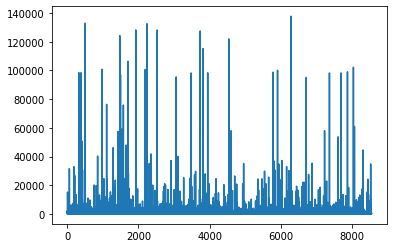

In [62]:
plt.plot(test_predictions["AdviewCount"])
plt.show()

## END